/tmp/ipython-input-1911317474.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, y="NAME", x="TOTAL_PAY", palette="Blues_r")


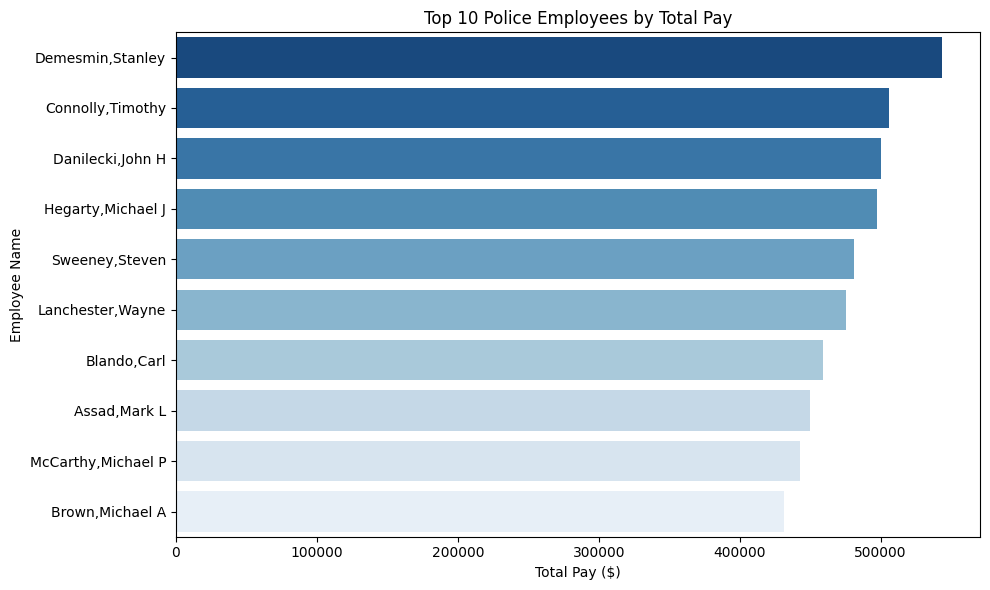

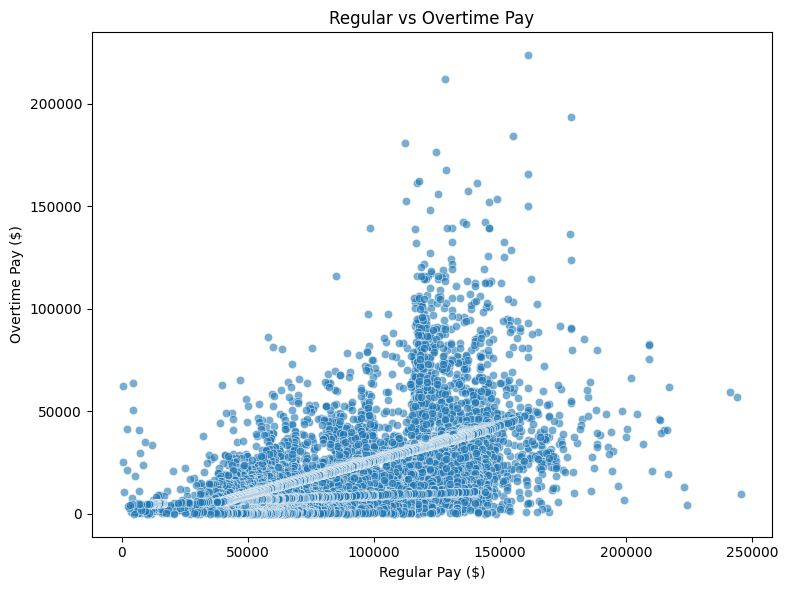

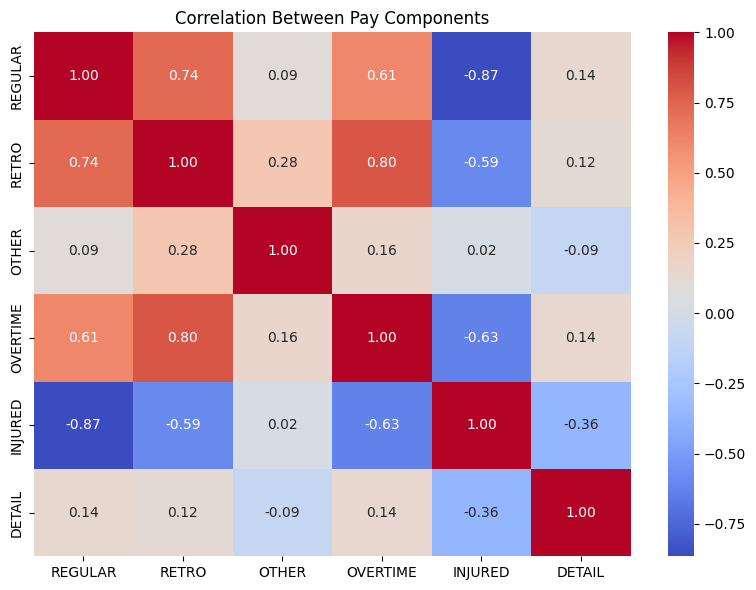

/tmp/ipython-input-1911317474.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pay_sums.index, y=pay_sums.values, palette="viridis")


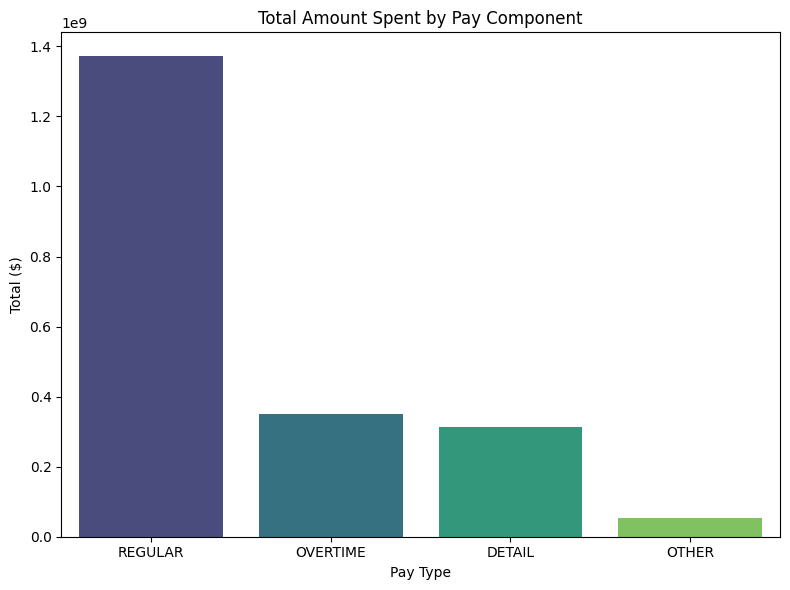

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("cleaned_police_overtime_data.csv")

# Compute total pay
df["TOTAL_PAY"] = df[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL"]].sum(axis=1)

# --- Top 10 earners ---
top10 = df.nlargest(10, "TOTAL_PAY")
plt.figure(figsize=(10,6))
sns.barplot(data=top10, y="NAME", x="TOTAL_PAY", palette="Blues_r")
plt.title("Top 10 Police Employees by Total Pay")
plt.xlabel("Total Pay ($)")
plt.ylabel("Employee Name")
plt.tight_layout()
plt.show()


# --- Relationship Between Regular and Overtime Pay ---
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="REGULAR", y="OVERTIME", alpha=0.6)
plt.title("Regular vs Overtime Pay")
plt.xlabel("Regular Pay ($)")
plt.ylabel("Overtime Pay ($)")
plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(df[["REGULAR", "RETRO", "OTHER", "OVERTIME", "INJURED", "DETAIL"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pay Components")
plt.tight_layout()
plt.show()

# --- Pay Component Distribution ---
pay_sums = df[["REGULAR", "OVERTIME", "OTHER", "DETAIL"]].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=pay_sums.index, y=pay_sums.values, palette="viridis")
plt.title("Total Amount Spent by Pay Component")
plt.xlabel("Pay Type")
plt.ylabel("Total ($)")
plt.tight_layout()
plt.show()


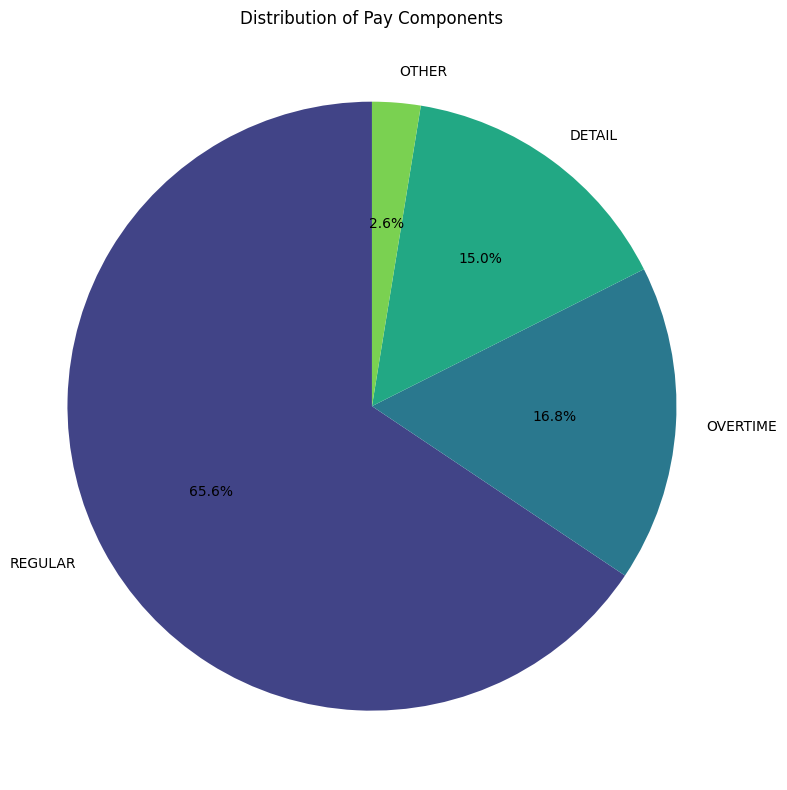

In [3]:

# --- Pie chart showing the distribution of pay components ---

plt.figure(figsize=(8, 8))
plt.pie(pay_sums.values, labels=pay_sums.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(pay_sums)))
plt.title("Distribution of Pay Components")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()